# Wordle Analysis
Wordle is popular game that many of us like to play at the start of our day, on a commute, in class, during work, or any time boredom calls!

You as the player must guess the wordle in 6 attempts where:
* Each guess must be a valid 5-letter word.
* The color of the tiles will change to show how close your guess was to the word.
    * Green - letter in the correct position and is in the wordle
    * Yellow - letter is in the wrong position and is in the wordle
    * Grey - letter is not in the wordle

It's simple, all you have to do is guess the 5 letter word (wordle) within 6 attempts and you win, well aside from the fact that there are 2,309 words that could be the wordle. 

This is where the analysis comes into play, the aim of this analysis is to gain insights and identify potential patterns between potential guesses the player can make and valid solution words. This can help to formulate strategies to make better guesses and reduce the number of attempts to guess the wordle. Hopefully it brings some value to your next wordle game. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import words
import string

## Data Extraction
The datasets that are being extracted are, the valid guesses that the player can make and the solution bank of words that could potentially be the wordle.

Valid guesses are words or set of letters that players can input to use as a guess to give clues of what letters are in the wordle.
The solution bank contains all the possible words that could be selected as the wordle. As of now it is a defined set and new words are yet to be added however this anaylsis will be updated once more words are added to ensure relevance. 

In [2]:
WordleSolutions = pd.DataFrame()
WordleValidGuesses = pd.DataFrame()

WordleSolutions = pd.read_csv("datasets/valid_answers.csv")
WordleValidGuesses = pd.read_csv("datasets/valid_guesses.csv")

## Letter Frequency 
We can employ an approach by analyzing the frequency of the letters to enhance our guessing strategy. By recognizing the likelihood of certain letters appearing in the target word, we can make more informed guesses, thereby improving our chances of success. 

Let's take a look at which letters appears the most in the solution bank and try to figure out which letters are most frequent.
With this investigation we could potentially determine what letters might be best used in the first guess.

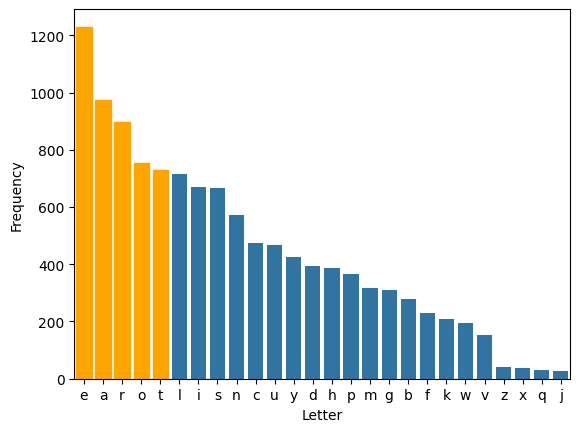

In [3]:
# Function to count letters of each word
def count_letters(word):
    letter_count = {}
    for letter in word:
        if letter in letter_count:
            letter_count[letter] += 1
        else:
            letter_count[letter] = 1
    return letter_count

WordleSolutions['letter_count'] = WordleSolutions['word'].apply(count_letters)

letter_frequency = {}
for index, row in WordleSolutions.iterrows():
    letter_count = row['letter_count']
    for letter, frequency in letter_count.items():
        if letter in letter_frequency:
            letter_frequency[letter] += frequency
        else:
            letter_frequency[letter] = frequency

LetterFrequency = pd.DataFrame(list(letter_frequency.items()), columns=['Letter', 'Frequency'])
LetterFrequency = LetterFrequency.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

ax = sns.barplot(data=LetterFrequency, x='Letter', y='Frequency')

top_5_letters = LetterFrequency.iloc[:5]
for i, (index, row) in enumerate(top_5_letters.iterrows()):
    ax.patches[i].set_color('orange')

We can observe that the most frequent letters are, e, a, r, o, and t as they occur the most of the 26 letters. 
Is this enough insight to make effective guesses? 
Unfortunately we might need some more analysis.😬

If we take a closer look at the plot, we can see the other letters are fairly distributed and the difference between the most frequent letters and the rest of the letters are not drastic except for the letters, z, x, q, and j as not as many words contain these letters. Due to the distribution, only examining the frequency of the letters proves to not provide sufficient insight on making a succesful guess as frequencies of the most frequent letters is not large enough in difference compared to the other letters that would ensure that those letters will be in the wordle. 

Another thing to note is that the above frequency analysis is that we need to consider words where the same letters appear more than once. The frequency of individual letters in such cases doesn't offer valuable insights because it doesn't help us maximize our chances of guessing as many solution words as possible.

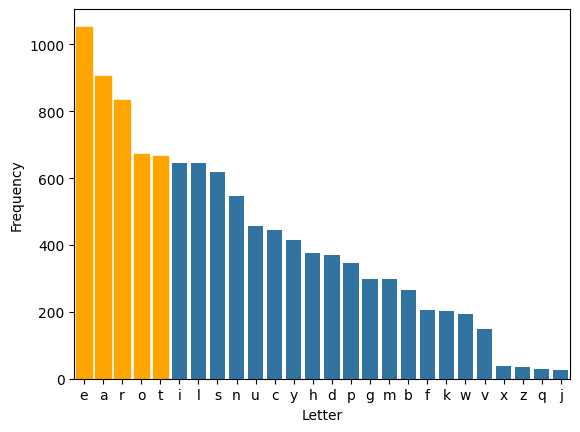

In [4]:
def count_letters(word):
    letter_count = {}
    for letter in set(word):  # Convert word to a set to eliminate duplicate letters
        letter_count[letter] = 1
    return letter_count

WordleSolutions['letter_count'] = WordleSolutions['word'].apply(count_letters)

letter_frequency = {}

for index, row in WordleSolutions.iterrows():
    letter_count = row['letter_count']
    for letter, frequency in letter_count.items():
        if letter in letter_frequency:
            letter_frequency[letter] += frequency
        else:
            letter_frequency[letter] = frequency

LetterFrequency = pd.DataFrame(list(letter_frequency.items()), columns=['Letter', 'Frequency'])
LetterFrequency = LetterFrequency.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

ax = sns.barplot(data=LetterFrequency, x='Letter', y='Frequency')

top_5_letters = LetterFrequency.iloc[:5]
for i, (index, row) in enumerate(top_5_letters.iterrows()):
    ax.patches[i].set_color('orange')


With the consideration of repeating letters, the letter frequencies have slightly changed in terms of the count and this represents a more accurate representation of the letter frequencies that can be useful for our analysis. The top 5 frequent letters and the distributions among the letters remain the same.

## Word Patterns
We saw that letter frequency alone might not be sufficient to make us a better wordle player so we need to dig deeper and take a look at word patterns. In this section, we will identify recurring word patterns or combinations of letters that frequently appear in valid solution words. This can aid in generating more targeted guesses.

### Prefix and Suffix


In [5]:
nltk.download('words')

english_words = words.words()

# Function to generate prefixes and suffixes
def generate_prefix_suffix(word):
    length = len(word)
    patterns = set()
    
    # Generate prefixes
    prefixes = {word[:i] for i in range(2, length)}
    
    # Generate suffixes
    suffixes = {word[-i:] for i in range(2, length)}
    
    return prefixes, suffixes

# Function to filter out valid English words from a list of words
def filter_valid_words(word_list):
    return [word for word in word_list if word in english_words]

# Add columns to record the patterns of each word
WordleSolutions['prefixes'], WordleSolutions['suffixes'] = zip(*WordleSolutions['word'].apply(generate_prefix_suffix))

# Filter out valid English word patterns
WordleSolutions['prefixes'].apply(filter_valid_words)
WordleSolutions['suffixes'].apply(filter_valid_words)

WordleSolutions

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Dominic\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


,word,letter_count,prefixes,suffixes
0,aback,"{'a': 1, 'c': 1, 'k': 1, 'b': 1}","{aba, ab, abac}","{ack, back, ck}"
1,abase,"{'s': 1, 'a': 1, 'e': 1, 'b': 1}","{aba, ab, abas}","{base, ase, se}"
2,abate,"{'e': 1, 'a': 1, 't': 1, 'b': 1}","{aba, ab, abat}","{bate, te, ate}"
3,abbey,"{'a': 1, 'e': 1, 'y': 1, 'b': 1}","{ab, abb, abbe}","{ey, bbey, bey}"
4,abbot,"{'a': 1, 't': 1, 'o': 1, 'b': 1}","{abbo, ab, abb}","{bbot, bot, ot}"
...,...,...,...,...
2304,young,"{'g': 1, 'o': 1, 'u': 1, 'y': 1, 'n': 1}","{you, yo, youn}","{oung, ung, ng}"
2305,youth,"{'t': 1, 'o': 1, 'u': 1, 'h': 1, 'y': 1}","{you, yout, yo}","{outh, th, uth}"
2306,zebra,"{'a': 1, 'z': 1, 'b': 1, 'e': 1, 'r': 1}","{zebr, ze, zeb}","{bra, ra, ebra}"
2307,zesty,"{'t': 1, 'z': 1, 's': 1, 'e': 1, 'y': 1}","{ze, zes, zest}","{sty, esty, ty}"


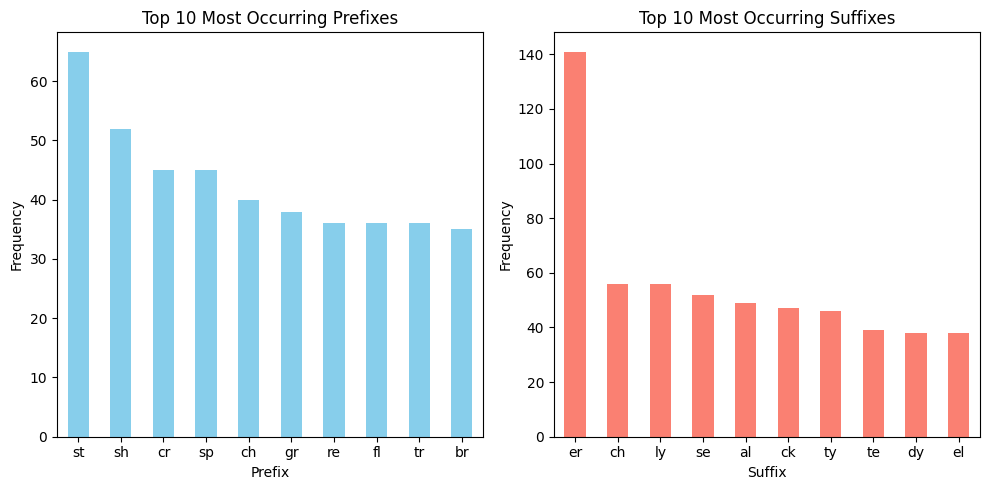

In [6]:
# Get all prefixes and suffixes from dataframe
all_prefixes = [prefix for prefixes in WordleSolutions['prefixes'] for prefix in prefixes]
all_suffixes = [suffix for suffixes in WordleSolutions['suffixes'] for suffix in suffixes]

# Count the frequency of each prefix and suffix
prefix_freq = pd.Series(all_prefixes).value_counts()
suffix_freq = pd.Series(all_suffixes).value_counts()

plt.figure(figsize=(10, 5))

# Plot most occuring prefixes
plt.subplot(1, 2, 1)
prefix_freq.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Occurring Prefixes')
plt.xlabel('Prefix')
plt.xticks(rotation=0)
plt.ylabel('Frequency')

# Plot most occuring suffixes
plt.subplot(1, 2, 2)
suffix_freq.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Most Occurring Suffixes')
plt.xlabel('Suffix')
plt.xticks(rotation=0)
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Examining the top 10 most occuring prefixes and suffixes, we can see that for the most common prefixes it is fairly well distributed while 'st' is the most frequent prefix indicating a minimal significance in probabilty among the common prefixes. Although the prefixes is are fairly distributed and gradually decreases on frequency, with the most occuring suffixes there is a noticeable suffix that occurs the most. From the plot, we can see that the suffix 'er' has a very high frequency and after that does the distribution gradually decrease. 

### Prefix-Suffix Pairings
incomplete section, deciding on analysis approach for prefix-suffix pairs

In [7]:
# # Function to generate prefix-suffix pairings
# def generate_prefix_suffix_pairing(word):
#     length = len(word)
#     patterns = set()

#     pairs = {word[:i] + '_' + word[-(length - i):] for i in range(1, length)}
    
#     return pairs

# WordleSolutions['prefix-suffix_pairs'] = WordleSolutions['word'].apply(generate_prefix_suffix_pairing)
# WordleSolutions['prefix-suffix_pairs'].apply(filter_valid_words)

# WordleSolutions

### Letter Co-occurence

Another word pattern we can take a look at are letter co-occurences. What this means is that we can analyze the occurences of letter that are most likely together, for example if we look at the letter 'e' we can analyze what letters follow the letter 'e' and count the number of times each letter follows 'e'. 

This can be useful when you make a guess where the letters are in the wordle and are in the right position. In this case, you can use the letter co-occurence analysis to better predict what the wordle is by checking what letters are likely to occur after the letters from your guess to fill in the missing gaps.

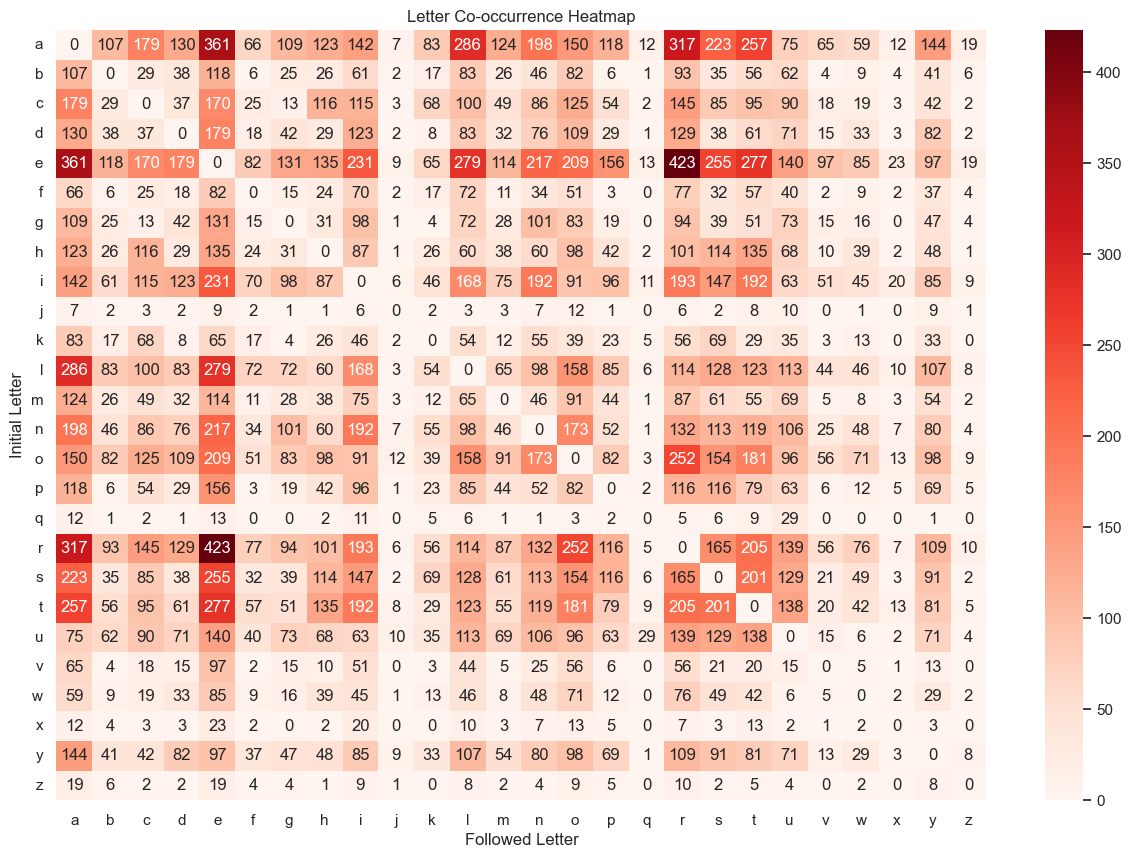

In [11]:
letters = string.ascii_lowercase
co_occurrence_matrix = pd.DataFrame(0, index=list(letters), columns=list(letters))

# Calculate co-occurrence matrix based on letter counts
for letter_count in WordleSolutions['letter_count']:
    for letter1 in letters:
        if letter1 in letter_count:
            for letter2 in letters:
                if letter2 in letter_count and letter1 != letter2:
                    co_occurrence_matrix.loc[letter1, letter2] += 1

plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(co_occurrence_matrix, annot=True, cmap="Reds", fmt="d")
plt.title('Letter Co-occurrence Heatmap')
plt.xlabel('Followed Letter')
plt.ylabel('Initial Letter')
plt.yticks(rotation=0)
plt.show()

The above is a generated heatmap to visualize the letter co-occurences for each letter. The benefit from this heatmap is that you can check to see what letters are likely and not likely to occur together across all letters. For instance, 'e' following 'r' occurs 423 times, making "re" a common sequence. Another notable pair is 't' followed by 'h', which appears 279 times. This suggests that "th" is a common combination, likely due to the frequency of words starting with "th" or containing "th".

Some combinations are rare or non-existent. For example, 'q' is rarely followed by any letter other than 'u', which occurs 317 times. This is expected due to the common usage of 'qu' in English

Based on the frequent combinations, we can prioritize guessing words that include common pairs like "re", "th", "er", "in", and "an". These sequences are likely to appear in Wordle solutions. Knowing that 'q' is almost always followed by 'u' can help in making educated guesses for words containing 'q'.

We should avoid guessing words with rare sequences such as 'q' followed by any letter other than 'u', or letters like 'j' and 'z' following letters where these combinations are rare.

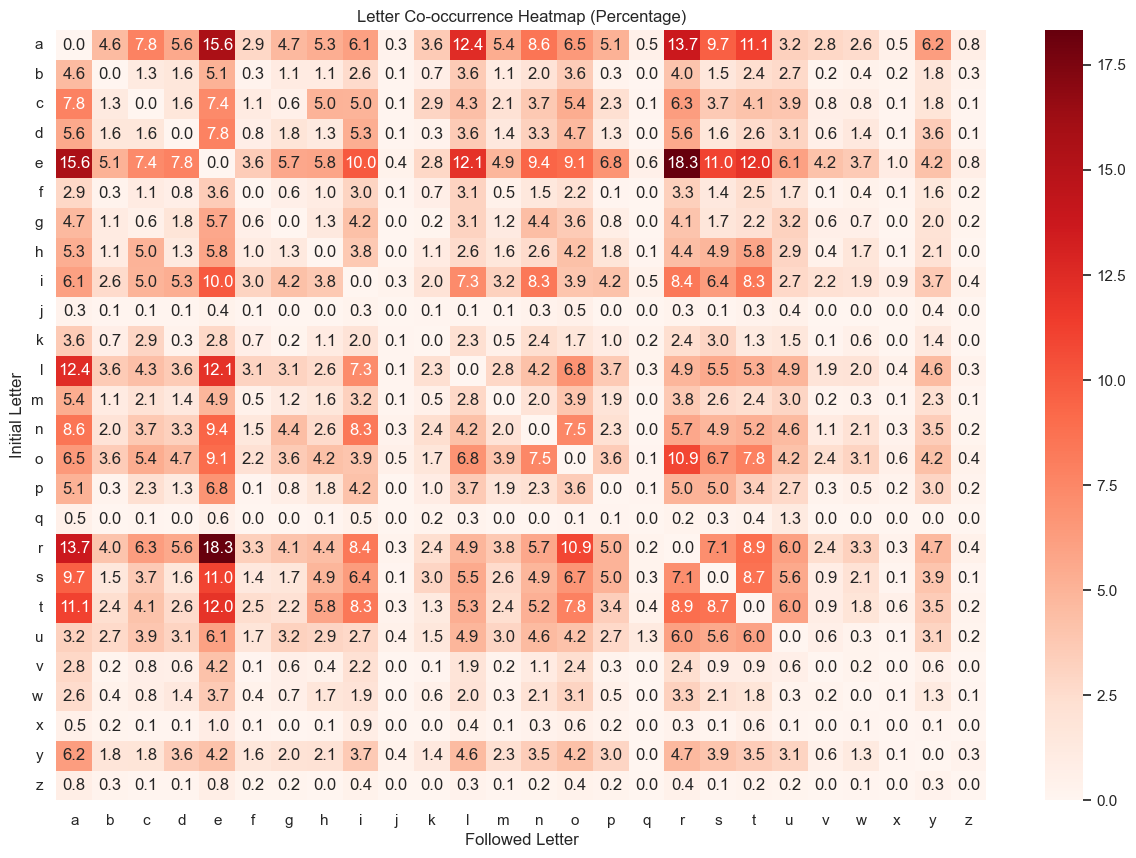

In [19]:
total_words = len(WordleSolutions['word'])
co_occurrence_matrix_percentage = (co_occurrence_matrix / total_words) * 100

plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(co_occurrence_matrix_percentage, annot=True, cmap="Reds", fmt=".1f")
plt.title('Letter Co-occurrence Heatmap (Percentage)')
plt.xlabel('Followed Letter')
plt.ylabel('Initial Letter')
plt.yticks(rotation=0)
plt.show()

The above is another generated heatmap to visualize the letter co-occurrences however this time it shows the letter occurences as percentages of the total word bank. This representation allows us to understand the probability of each letter following another, giving insights into how likely certain sequences are in Wordle solutions.

Although some letter pairs are more common than others as we saw in the other heatmap, the percentages indicate that there is still a high diversity of possible letter combinations and we should also keep in mind that we are examining the letter occurences against a word bank of over 2000 words.